In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

In [82]:
df=pd.read_csv(r'train.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

# Data Cleansing

In [84]:
#check missing value
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


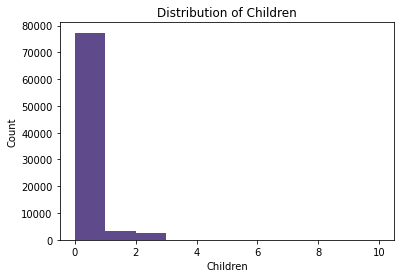

In [85]:

plt.hist(df['children'],color='#5F4B8B')
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

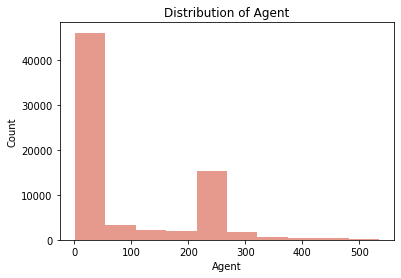

In [86]:
plt.hist(df['agent'],color='#E69A8D')
plt.title('Distribution of Agent')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.show()

In [87]:
#handing missing values
df.drop(['company'],axis='columns',inplace=True)
# df.drop(['reservation_status'],axis='columns',inplace=True)
df['children'].fillna(df['children'].median(),inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['agent'].fillna(df['agent'].median(),inplace=True)

In [88]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83293 non-null  float64       
 11  ba

In [90]:
df.duplicated().sum()

0

In [91]:
#check outlier
numericals=df.select_dtypes(include=['number']).columns
total_otlier=0
for column in numericals:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bond=q1-1.5*iqr
    upper_bond=q3+1.5*iqr

    outlier=df[(df[column]<lower_bond)|(df[column]>upper_bond)]
    total_otlier +=outlier.shape[0]
print(f'Total outlier di seluruh data frame: {total_otlier}')

Total outlier di seluruh data frame: 67599


# Exploratory Data Analysis

In [92]:
#info data numericals
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103610,0.008032,0.030243,0.086994,0.141765,0.223068,76.890711,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398815,0.100641,0.171255,0.862988,1.554390,0.656237,106.007919,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,535.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


Obsevasi:
- rata-rata not canceled
- range pemesnan 2017-2019
- rata rata customer nginep 2 malam di weekend
- rata-rata customer nginep 3 malam di hari kerja
- rata-rata customer dua orang dewasa
- rata-rata cutomer tambahan seperti childeren and babies 0

In [93]:
#info data categorical
categorical=df.select_dtypes(include=['object']).columns
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,83293,83293,83293,83293,83293,83293,83293,83293,83293,83293,83293
unique,64,12,5,165,8,5,10,11,3,4,3
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,1373,9643,64424,34298,39445,68368,60062,51702,72979,62535,52516


Observasi:
- Hotel yang paling banyak dipesan adalah Renaissance New York Times Square Hotel New York
- Bulan Agustus banyak customer tiba
- Untuk paket meal customer paling banyak memilih BB
- Customer paling banyak dari kota Portugal

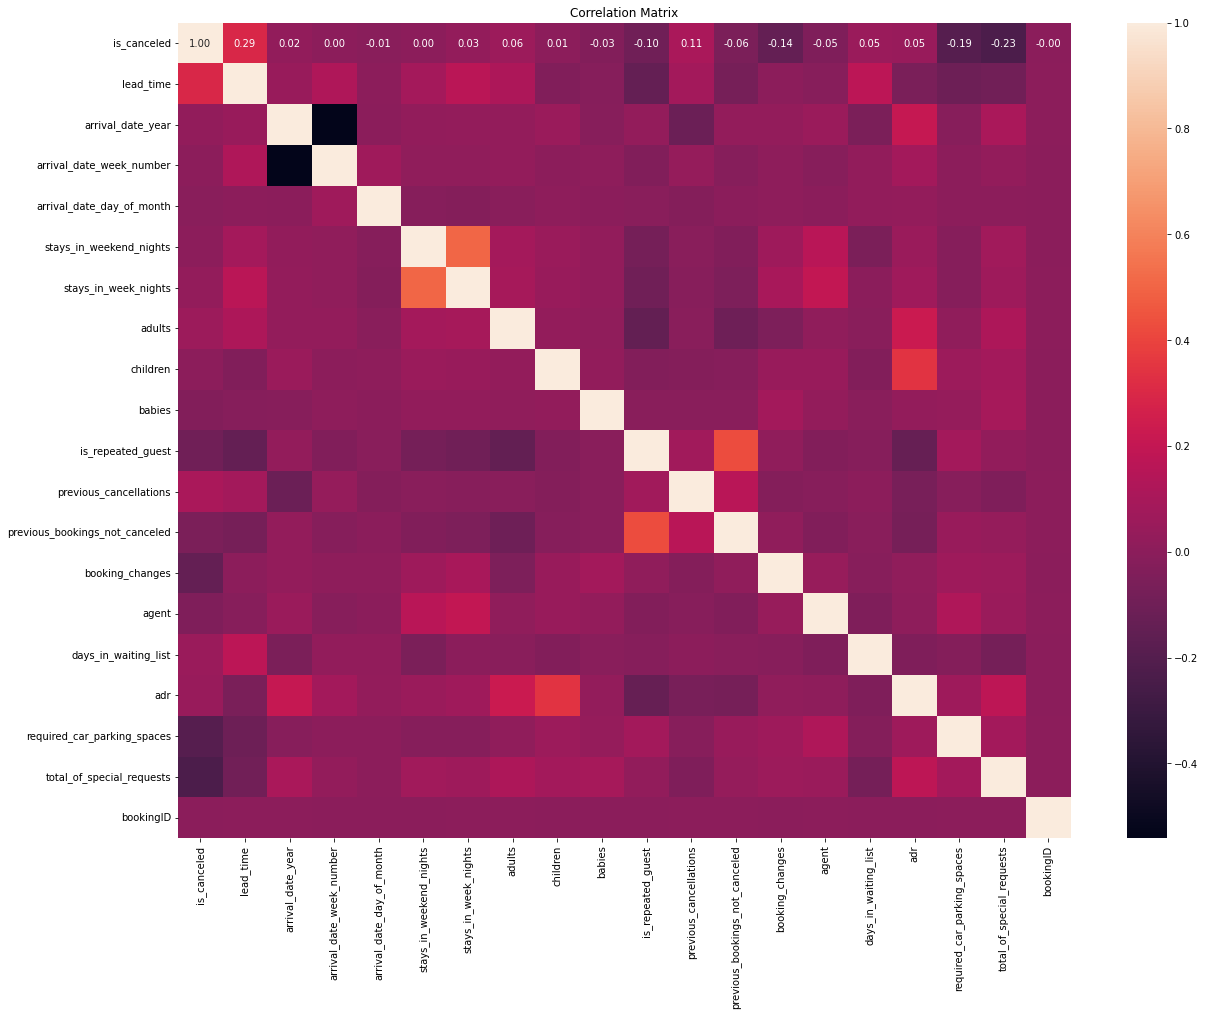

In [94]:
#correlation heatmap
plt.figure(figsize=(20,15))
correlation=df[numericals].corr()
sns.heatmap(correlation, annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Deep Analysis

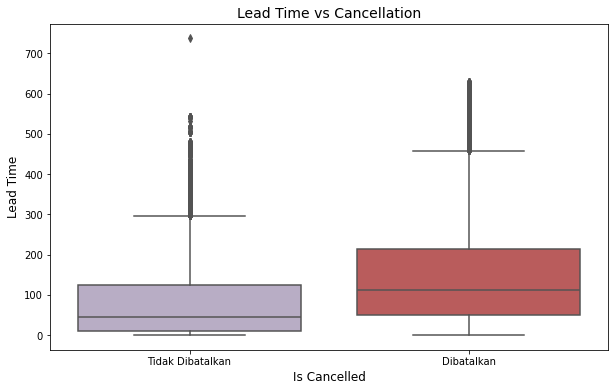

In [95]:
# Penyebab pelanggan membatalkan reservasi
plt.figure(figsize=(10,6))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette={0:'#b8a9c9',1:'#c94c4c'})

plt.title('Lead Time vs Cancellation',fontsize=14)
plt.xlabel('Is Cancelled',fontsize=12)
plt.ylabel('Lead Time',fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()


Observasi:
- Lebih panjang lead time, semakin tinggi kemungkinan pembatalan.

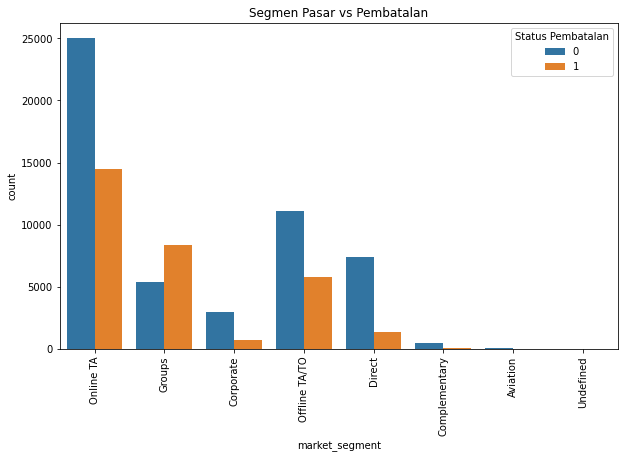

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.title('Segmen Pasar vs Pembatalan')
plt.xticks(rotation=90)
plt.legend(title='Status Pembatalan',loc='upper right')
plt.show()

Observasi:
- Lebih banyak segmen group yang membatalkan dibandingkan dengan reservasi yang tidak dibatalkan. 
- Online TA memiliki reservasi terbanyak, yang membatalkan masih lebih sedikit dibandingkan yang berhasil

In [97]:
df['market_segment'].unique()

array(['Online TA', 'Groups', 'Corporate', 'Offline TA/TO', 'Direct',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

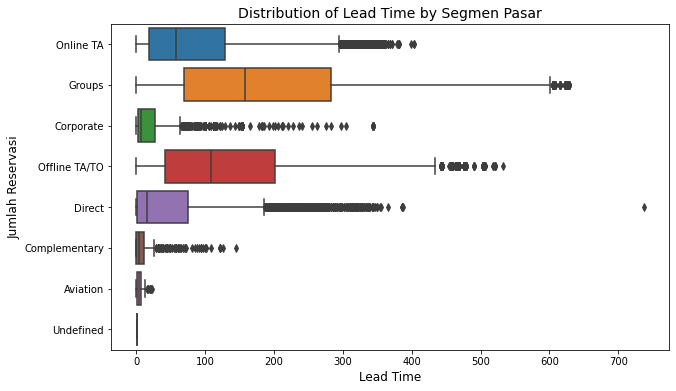

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='lead_time',y='market_segment')
plt.title('Distribution of Lead Time by Segmen Pasar',fontsize=14)
plt.xlabel('Lead Time',fontsize=12)
plt.ylabel('Jumlah Reservasi',fontsize=12)
# plt.legend(title='Segmen Pasar')
plt.show()

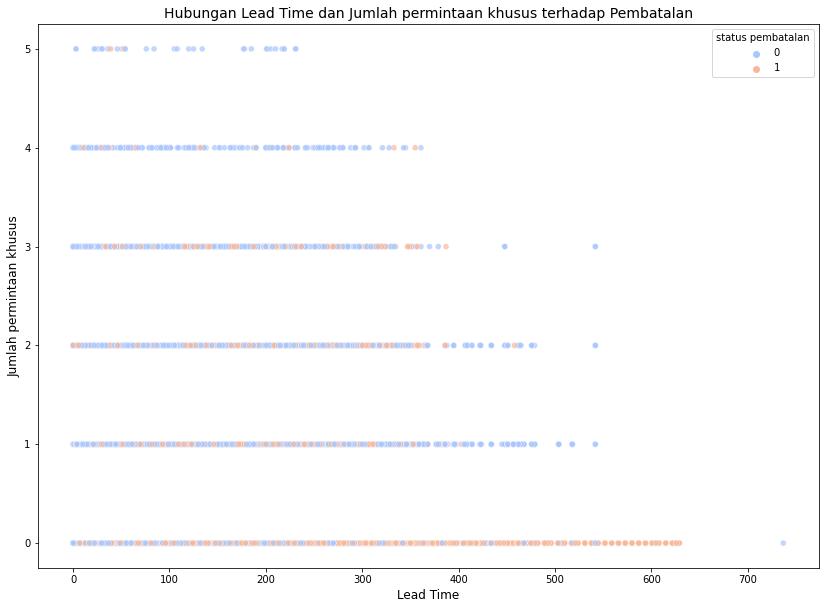

In [99]:
# Mengatur ukuran gambar
plt.figure(figsize=(14, 10))

sns.scatterplot(data=df,x='lead_time',y='total_of_special_requests',hue='is_canceled',palette='coolwarm',alpha=0.7)
plt.title('Hubungan Lead Time dan Jumlah permintaan khusus terhadap Pembatalan',fontsize=14)
plt.xlabel('Lead Time',fontsize=12)
plt.ylabel('Jumlah permintaan khusus',fontsize=12)
plt.legend(title='status pembatalan')
plt.show()

plt.show()